In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import shap
import deepexplain
import lime
from lime import lime_image

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Define the model
model = keras.Sequential([
    keras.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.1)

# Get predictions for test set
y_pred = model.predict(x_test)

# Get the top predicted class for each image
y_pred_labels = np.argmax(y_pred, axis=1)

Epoch 1/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2752 - accuracy: 0.9203 - val_loss: 0.1194 - val_accuracy: 0.9690
Epoch 2/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1176 - accuracy: 0.9656 - val_loss: 0.0889 - val_accuracy: 0.9750
Epoch 3/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0796 - accuracy: 0.9760 - val_loss: 0.0760 - val_accuracy: 0.9762
Epoch 4/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0600 - accuracy: 0.9816 - val_loss: 0.0721 - val_accuracy: 0.9800
Epoch 5/5
313/313 [==============================] - 0s 1ms/step


True label:  7
Predicted label:  7


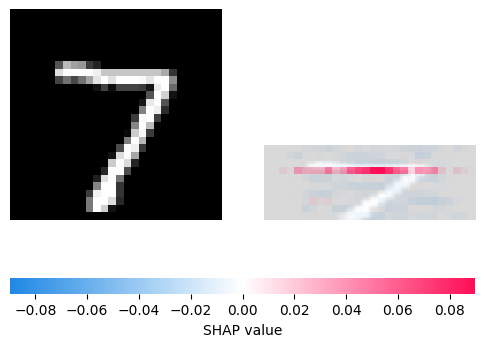

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


ValueError: Found input variables with inconsistent numbers of samples: [1000, 3000]

In [6]:
# Get explanations for SHAP, DeepLIFT, and LIME
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

explainer_shap = shap.DeepExplainer(model, background)
shap_values = explainer_shap.shap_values(x_test[0:10])

# explainer_deeplift = deepexplain.explain("deeplift", model, x_test[0:10])

explainer_lime = lime_image.LimeImageExplainer()

# Visualize the explanations
for i in range(10):
    print("True label: ", y_test[i])
    print("Predicted label: ", y_pred_labels[i])
    shap.image_plot(shap_values[i], x_test[i])
#     print("DeepLIFT explanation: ", explainer_deeplift[i])
    explanation_lime = explainer_lime.explain_instance(x_test[i], model.predict, top_labels=1)
    print("LIME explanation: ", explanation_lime.local_exp[0])
    print("\n")

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("./household_power_consumption.txt", 
                   sep=';', header=0, low_memory=False, infer_datetime_format=True, 
                   parse_dates={'datetime':[0,1]}, index_col=['datetime'])

# Drop missing values
data = data.dropna()

# Extract the features and target variable
X = data.drop('Global_active_power', axis=1).values
y = data['Global_active_power'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')
y_train, y_test = y_train.astype('float32'), y_test.astype('float32')

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=1024, validation_data=(X_test, y_test))

Train on 1639424 samples, validate on 409856 samples
Epoch 1/10
1633280/1639424 [============================>.] - ETA: 0s - loss: 0.8628

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1639424/1639424 [==============================] - 6s 3us/sample - loss: 0.8604 - val_loss: 0.1310
Epoch 2/10
1639424/1639424 [==============================] - 5s 3us/sample - loss: 0.1815 - val_loss: 0.0790
Epoch 3/10
1639424/1639424 [==============================] - 5s 3us/sample - loss: 0.1532 - val_loss: 0.0795
Epoch 4/10
1639424/1639424 [==============================] - 5s 3us/sample - loss: 0.1451 - val_loss: 0.1004
Epoch 5/10
1639424/1639424 [==============================] - 6s 3us/sample - loss: 0.1416 - val_loss: 0.1232
Epoch 6/10
1639424/1639424 [==============================] - 5s 3us/sample - loss: 0.1398 - val_loss: 0.1084
Epoch 7/10
1639424/1639424 [==============================] - 5s 3us/sample - loss: 0.1363 - val_loss: 0.1087
Epoch 8/10
1639424/1639424 [==============================] - 5s 3us/sample - loss: 0.1250 - val_loss: 0.0619
Epoch 9/10
1639424/1639424 [==============================] - 5s 3us/sample - loss: 0.1035 - val_loss: 0.0747
Epoch 10/10
1639424/1

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


  0%|          | 0/10 [00:00<?, ?it/s]

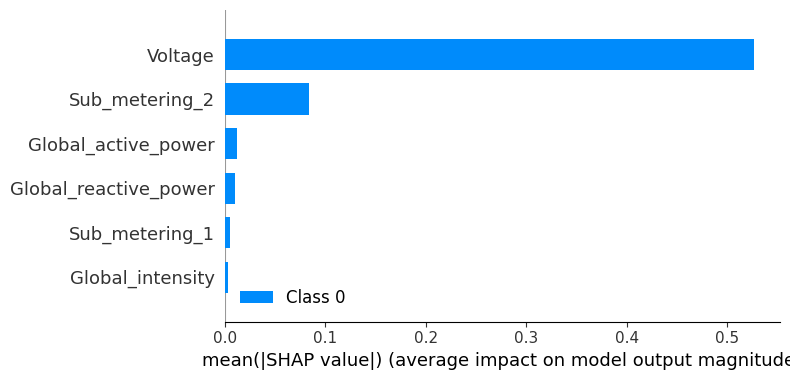

In [15]:
import shap

# Initialize the SHAP explainer
explainer = shap.KernelExplainer(model.predict, X_train[:100])

# Calculate SHAP values
shap_values = explainer.shap_values(X_test[:10])

# Plot the SHAP values
shap.summary_plot(shap_values, X_test[:10], feature_names=data.columns[:-1], plot_type='bar')


In [20]:
y_test = model.predict(X_test)

In [31]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize the Lime explainer
explainer = LimeTabularExplainer(X_train, feature_names=data.columns[:-1], class_names=['Global_active_power'])

# Explain a single instance
exp = explainer.explain_instance(X_test[0], model.predict, labels=[1])

# Plot the explanation
display(exp.as_pyplot_figure())



                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    


IndexError: index 1 is out of bounds for axis 1 with size 1

In [30]:
exp.as_list()

KeyError: 1

In [18]:
from deeplift.layers import NonlinearMxtsMode
from deeplift.conversion import kerasapi_conversion as kc
import numpy as np

# Convert the Keras model to a DeepLift model
deeplift_model = kc.convert_model_from_saved_files("my_model.h5", nonlinear_mxts_mode=NonlinearMxtsMode.DeepLIFT_GenomicsDefault)

# Initialize the DeepLift explainer
explainer = deeplift_model.get_target_contribs_func(find_scores_layer_idx=0)

# Calculate DeepLift scores
scores = explainer(task_idx=0, input_data_list=[X_test[:10]], input_references_list=[np.zeros_like(X_test[:10])])

# Plot the scores


ModuleNotFoundError: No module named 'deeplift'

In [1]:
from softcomputing_packages_bu import *

Copyright 2016, Seok-Jun Bu, Softcomputing Lab. All Rights Reserved.
Importing Soft-computing Packages . . .
	General python-science packages loaded.
	Deep learning toolkit loaded.
	Handcrafted functions loaded:
		sjbu_sample(X, n_sample, shuffle=True/False)
		sjbu_scaler(X, mode='standard/robust/minmax/maxabs', channel='first')
		sjbu_plot_history(model_history, mode='loss', title='Entropy')
		sjbu_confusion_matrix(model_input, feature, label, class_list=['first', 'second'], fig_size=(5,5))
		sjbu_categorical_recall(input_class_idx)
		sjbu_set_font(font_family='Times New Roman', font_size=10)
. . . Done.


In [7]:
# fill missing values with a value at the same time one day ago
def fill_missing(values):
    one_day = 60 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if np.isnan(values[row, col]):
                values[row, col] = values[row - one_day, col]
 
# load all data
dataset = pd.read_csv('../../../dataset/kepco/household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# mark all missing values
dataset.replace('?', np.nan, inplace=True)
# make dataset numeric
dataset = dataset.astype('float32')
# fill missing
fill_missing(dataset.values)
# add a column for for the remainder of sub metering
values = dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])
# resample data per resolution
time_resolution = '4H'
dataset_resampled = dataset.resample(time_resolution).mean()
# summarize
print(dataset_resampled.shape)
print(dataset_resampled.head())
dataset_resampled.to_csv('./dataset_resampled.csv')

(8648, 8)
                     Global_active_power  Global_reactive_power     Voltage  \
datetime                                                                      
2006-12-16 16:00:00             3.679295               0.116410  234.076553   
2006-12-16 20:00:00             2.646692               0.069842  237.652451   
2006-12-17 00:00:00             2.120333               0.099283  242.935577   
2006-12-17 04:00:00             1.783958               0.077083  243.388214   
2006-12-17 08:00:00             2.634883               0.148275  238.131256   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 16:00:00         15.755129        0.000000        3.256410   
2006-12-16 20:00:00         11.345834        0.000000        0.158333   
2006-12-17 00:00:00          9.112500        0.000000        6.758333   
2006-12-17 04:00:00          7.558333        0.000000        0.404167  

In [2]:
dataset = pd.read_csv('./dataset_resampled.csv', header=None, skiprows=1).values[:, 1:].astype('float')
dataset_norm = np.copy(dataset)
for c in range(8):
    dataset_norm[:, c] -= dataset[:, c].min()
    dataset_norm[:, c] /= (dataset[:, c].max()-dataset[:, c].min())
print(dataset_norm.shape)
window_size = 10
n_window = dataset_norm.shape[0]-window_size+1
X, Y = [], []
for w in range(n_window-1):
    X.append(dataset_norm[w:w+window_size])
    Y.append(dataset[w+window_size, 0])
X, Y = np.asarray(X), np.asarray(Y)
print(X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(8648, 8)
(8638, 10, 8) (8638,)
(6910, 10, 8) (1728, 10, 8)
(6910,) (1728,)


In [9]:
# Build and train the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=50, batch_size=64, verbose=2, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=2)])

# Calculate the model predictions
y_pred = model.predict(X_test)

Epoch 1/50
98/98 - 3s - loss: 0.5425 - val_loss: 0.4492 - 3s/epoch - 31ms/step
Epoch 2/50
98/98 - 2s - loss: 0.4213 - val_loss: 0.4198 - 2s/epoch - 19ms/step
Epoch 3/50
98/98 - 2s - loss: 0.3953 - val_loss: 0.4160 - 2s/epoch - 19ms/step
Epoch 4/50
98/98 - 2s - loss: 0.3807 - val_loss: 0.3808 - 2s/epoch - 18ms/step
Epoch 5/50
98/98 - 2s - loss: 0.3616 - val_loss: 0.3609 - 2s/epoch - 18ms/step
Epoch 6/50
98/98 - 2s - loss: 0.3506 - val_loss: 0.3499 - 2s/epoch - 19ms/step
Epoch 7/50
98/98 - 2s - loss: 0.3354 - val_loss: 0.3308 - 2s/epoch - 18ms/step
Epoch 8/50
98/98 - 2s - loss: 0.3253 - val_loss: 0.3225 - 2s/epoch - 18ms/step
Epoch 9/50
98/98 - 2s - loss: 0.3173 - val_loss: 0.3148 - 2s/epoch - 19ms/step
Epoch 10/50
98/98 - 2s - loss: 0.3077 - val_loss: 0.3062 - 2s/epoch - 19ms/step
Epoch 11/50
98/98 - 2s - loss: 0.2975 - val_loss: 0.3072 - 2s/epoch - 19ms/step
Epoch 12/50
98/98 - 2s - loss: 0.3002 - val_loss: 0.3029 - 2s/epoch - 18ms/step
Epoch 13/50
98/98 - 2s - loss: 0.2944 - val_loss:

In [10]:
model.save('./model.h5')

In [3]:
import deepexplain
from lime.lime_tabular import LimeTabularExplainer
import shap

In [7]:
# Load model
model = load_model('./model.h5')

# # Apply SHAP
# explainer = shap.DeepExplainer(model, X_train)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test, feature_names=['Active power', 'Reactive power', 'Voltage', 'Intensity', 'Kitchen', 'Laundry', 'Control', 'Others'])

# # Apply DeepLIFT
# with deepexplain(session=tf.compat.v1.keras.backend.get_session()) as de:
#     input_tensor = model.layers[0].input
#     fModel = Model(inputs=input_tensor, outputs=model.output)
#     target_tensor = fModel(input_tensor)
#     attribution = de.explain('deeplift', target_tensor * Y_test, input_tensor, X_test)
#     print(attribution)

# Apply LIME
explainer = LimeTabularExplainer(X_train, feature_names=['Active power', 'Reactive power', 'Voltage', 'Intensity', 'Kitchen', 'Laundry', 'Control', 'Others'], class_names=['Global_active_power'])
exp = explainer.explain_instance(X_test[0], model.predict)
exp.show_in_notebook(show_table=True, show_all=False)

IndexError: boolean index did not match indexed array along dimension 1; dimension is 10 but corresponding boolean dimension is 8

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
import shap

# load dataset
dataset = pd.read_csv('./household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
dataset.replace('?', np.nan, inplace=True)
dataset = dataset.astype('float32')

# fill missing values
one_day = 60 * 24
for row in range(dataset.shape[0]):
    for col in range(dataset.shape[1]):
        if np.isnan(dataset.values[row, col]):
            dataset.values[row, col] = dataset.values[row - one_day, col]

# add a column for for the remainder of sub metering
values = dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

# resample data per resolution
time_resolution = '4H'
dataset_resampled = dataset.resample(time_resolution).mean()

# normalize dataset
dataset_norm = np.copy(dataset_resampled)
for c in range(8):
    dataset_norm[:, c] -= dataset[:, c].min()
    dataset_norm[:, c] /= (dataset[:, c].max()-dataset[:, c].min())

# create sliding window and split dataset into train and test sets
window_size = 10
n_window = dataset_norm.shape[0]-window_size+1
X, Y = [], []
for w in range(n_window-1):
    X.append(dataset_norm[w:w+window_size])
    Y.append(dataset[w+window_size, 0])
X, Y = np.asarray(X), np.asarray(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
# define LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# train model
model.fit(X_train, Y_train, epochs=50, batch_size=512, validation_split=0.1, verbose=2)


In [10]:
# Apply SHAP on a specific step
step = 20
explainer = shap.DeepExplainer(model, X_train)
shap_values = explainer.shap_values(X_test[step:step+1])
shap.summary_plot(shap_values, X_test[step], feature_names=['Active power', 'Reactive power', 'Voltage', 'Intensity', 'Kitchen', 'Laundry', 'Control', 'Others'])

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


StagingError: in user code:

    File "/home/sjbuhan/anaconda3/envs/tensorflow2.9/lib/python3.9/site-packages/shap/explainers/_deep/deep_tf.py", line 252, in grad_graph  *
        x_grad = tape.gradient(out, shap_rAnD)

    LookupError: gradient registry has no entry for: shap_TensorListStack
